# Prepare Data


What is it? 
- the stage after acquiring our data that ensures our data is ready for exploration and eventually modeling

- Pipeline: Plan - Acquire - **Prepare** - Explore - Model - Deliver


Why do we care?
- because we need our data to be tidy and clean for accurate exploration
- because we need our data split to be able to adaquately evaluate our model 


How do we do it?
- start with one dataframe from acquire
1. summarize the data
2. clean the data
3. split the data: train, validate, and test
- end with `prepare.py` file

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import our own acquire module
import acquire

## This Lesson - Titanic Dataset

Project goal: predict who survived the titanic

## Acquire 

- use my `acquire.py` since i've already established this step

In [162]:
# get titanic data
df = acquire.get_titanic_data()

csv file found and loaded


In [163]:
#look at data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [164]:
df.describe(include='all')

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
count,891.000000,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,203,889,891.000000
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,7,3,NaN
top,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,C,Southampton,NaN
freq,NaN,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,59,644,NaN
mean,445.000000,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,0.602694
std,257.353842,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,0.489615
min,0.000000,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,222.500000,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,0.000000
50%,445.000000,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,1.000000
75%,667.500000,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,1.000000


In [165]:
df.shape

(891, 13)

## Prepare

## STEP 1: Summarize

- understand your data
- visualize your variables (univariate only)

#### understand your data

In [166]:
# Get information about the dataframe: column names, rows, datatypes, non-missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


Do we know what all the columns mean? 
- passenger_id: this the unique id of a passenger
- survived: this is whether or not somewhere survived
- pclass: Passenger Class
- sex: sex
- age: age
- sibsp: Number of Siblings/Spouses Aboard
- parch: Number of Parents/Children Aboard
- fare: Passenger Fare
- embarked: 
- class:
- deck:
- embarked_town: Port of Embarkation	C = Cherbourg; Q = Queenstown; S = Southampton
- alone:

What does one row of data respresent? 
- a unique passenger with all their demographic info and ship info 

What is our target variable? 
- survived

In [167]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


#### visualize your data (univariate)

In [168]:
#find numeric columns
num_col = df.select_dtypes(include='number').columns
num_col

Index(['passenger_id', 'survived', 'pclass', 'age', 'sibsp', 'parch', 'fare',
       'alone'],
      dtype='object')

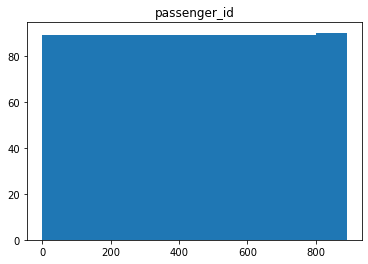

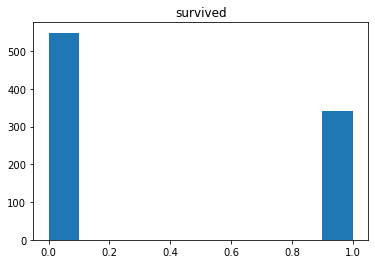

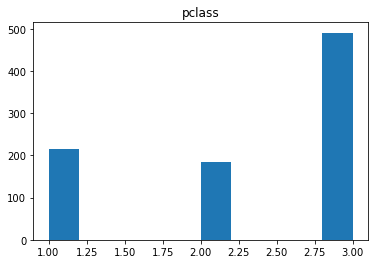

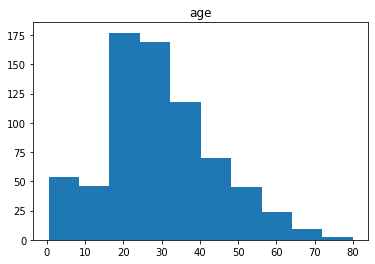

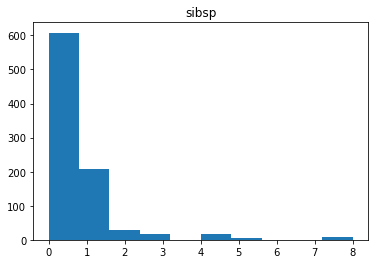

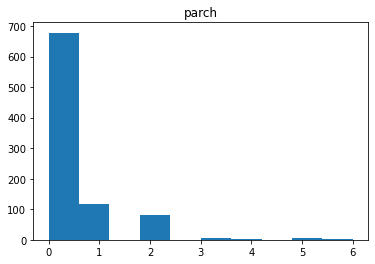

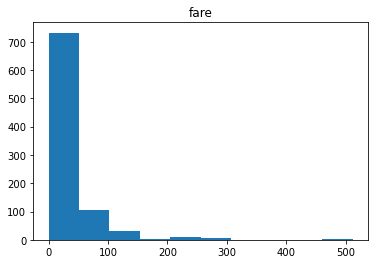

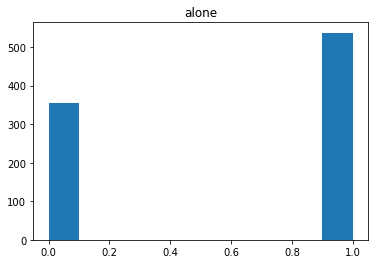

In [169]:
#plot distributions of numeric columns
for col in num_col:
#     print(col)
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [170]:
#get string columns
str_col = df.columns [df.dtypes == 'object']
str_col

Index(['sex', 'embarked', 'class', 'deck', 'embark_town'], dtype='object')

In [171]:
df.deck.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [172]:
#see the null values in value counts
df.deck.value_counts(dropna=False)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

sex
male      577
female    314
Name: sex, dtype: int64
male      0.647587
female    0.352413
Name: sex, dtype: float64


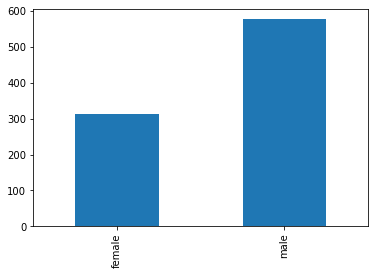


embarked
S    644
C    168
Q     77
Name: embarked, dtype: int64
S    0.724409
C    0.188976
Q    0.086614
Name: embarked, dtype: float64


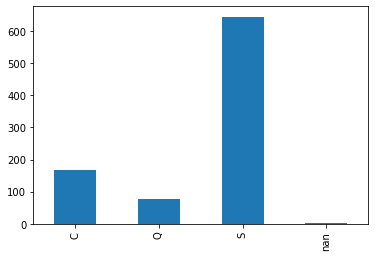


class
Third     491
First     216
Second    184
Name: class, dtype: int64
Third     0.551066
First     0.242424
Second    0.206510
Name: class, dtype: float64


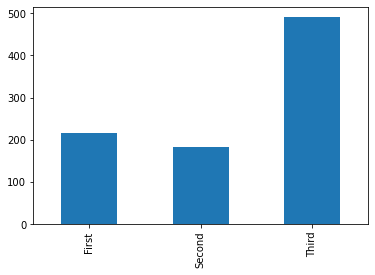


deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64
C    0.290640
B    0.231527
D    0.162562
E    0.157635
A    0.073892
F    0.064039
G    0.019704
Name: deck, dtype: float64


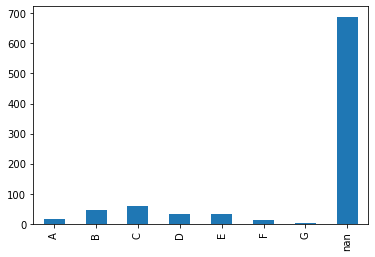


embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64
Southampton    0.724409
Cherbourg      0.188976
Queenstown     0.086614
Name: embark_town, dtype: float64


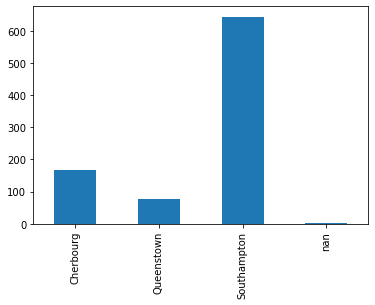

In [173]:
#plot distributions of string columns
for col in str_col:
    print(col)
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True)) #percentage
    df[col].value_counts(dropna=False).sort_index().plot.bar()
    plt.show()
    print()

# STEP 2: Clean the data

- take care of duplicates
- verify datatypes
- handle nulls
- consider outliers
- for modeling: make all columns numeric

Note: there are other things to consider in the prepare phase that we will talk about in future methodologies

### Duplicate Data

In [174]:
#look at data
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


#### are there any duplicates in passenger_id?

In [175]:
df.passenger_id.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: passenger_id, Length: 891, dtype: bool

In [176]:
df.passenger_id.duplicated().sum()

0

In [177]:
df [df.passenger_id.duplicated()]

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone


#### embarked and embark_town columns

In [178]:
df.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [179]:
df.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [180]:
#view counts across both
pd.crosstab(df.embark_town, df.embarked)

embarked,C,Q,S
embark_town,,,
Cherbourg,168,0,0
Queenstown,0,77,0
Southampton,0,0,644


In [181]:
#drop unnecessary column
df = df.drop(columns='embark_town')

In [182]:
#verify
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,1


#### pclass and class columns

In [183]:
#view counts across both
pd.crosstab(df.pclass, df['class'])

class,First,Second,Third
pclass,,,
1,216,0,0
2,0,184,0
3,0,0,491


**Note:** The machine learning models can only accept numeric values. Therefore, we will remove the class column instead the pclass column.

In [184]:
#drop unnecessary column
df = df.drop(columns='class')

In [185]:
pd.crosstab(df.sibsp, df.alone)

alone,0,1
sibsp,,
0,71,537
1,209,0
2,28,0
3,16,0
4,18,0
5,5,0
8,7,0


### Verify Datatypes

In [186]:
df.dtypes

passenger_id      int64
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
deck             object
alone             int64
dtype: object

In [187]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,alone
0,0,0,3,male,22.0,1,0,7.2500,S,NaN,0
1,1,1,1,female,38.0,1,0,71.2833,C,C,0
2,2,1,3,female,26.0,0,0,7.9250,S,NaN,1
3,3,1,1,female,35.0,1,0,53.1000,S,C,0
4,4,0,3,male,35.0,0,0,8.0500,S,NaN,1


### Handle Nulls

some options
- delete all nulls rows
- delete that column
- fill with a median value (numeric columns) 
- fill with the mode (string columns)
- fill with with 0

Note: not all these answers will make sense for your column!!

In [188]:
#find were null values are
df.isnull().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
deck            688
alone             0
dtype: int64

In [189]:
#isolate nulls values
df.isnull().sum() [df.isnull().sum() > 0]

age         177
embarked      2
deck        688
dtype: int64

#### age

In [190]:
#check counts
df.age.value_counts(dropna=False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: age, Length: 89, dtype: int64

In [191]:
#check percentage
df.age.isnull().mean()

0.19865319865319866

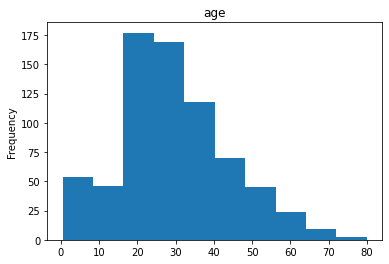

In [192]:
#plot it
df.age.plot.hist()
plt.title('age')
plt.show()

- there doesnt seem like an appropriate value to replace
- we will delete the entire column, for now
- with more time, i might come back and see if there is a way to keep the age column 

In [193]:
#drop
df = df.drop(columns='age')

In [194]:
#verify 
df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,deck,alone
0,0,0,3,male,1,0,7.2500,S,NaN,0
1,1,1,1,female,1,0,71.2833,C,C,0
2,2,1,3,female,0,0,7.9250,S,NaN,1
3,3,1,1,female,1,0,53.1000,S,C,0
4,4,0,3,male,0,0,8.0500,S,NaN,1


#### deck

In [197]:
df.deck.value_counts(dropna=False)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

In [199]:
df.deck.isnull().mean()

0.7721661054994389

- there are way too much null values
- will definitely delete this column

In [201]:
df = df.drop(columns='deck')

In [202]:
df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone
0,0,0,3,male,1,0,7.2500,S,0
1,1,1,1,female,1,0,71.2833,C,0
2,2,1,3,female,0,0,7.9250,S,1
3,3,1,1,female,1,0,53.1000,S,0
4,4,0,3,male,0,0,8.0500,S,1


#### embarked

In [204]:
#look at embark_town value counts with nulls
df.embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: embarked, dtype: int64

We could fill `embark_town` with most common value, 'Southampton', by hard-coding the value using the `fillna()` function

In [206]:
#fill it!
df.embarked = df.embarked.fillna(value='S')

In [207]:
#verify
df.embarked.value_counts(dropna=False)

S    646
C    168
Q     77
Name: embarked, dtype: int64

### Outliers

options
- keep 
- remove
- stretch/compress

<AxesSubplot:>

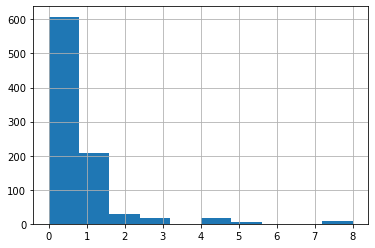

In [208]:
df.sibsp.hist()

<AxesSubplot:>

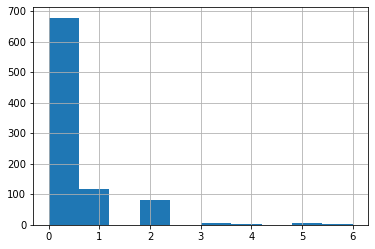

In [209]:
df.parch.hist()

There are a few outliers potentially in sibsp, parch, but without specific domain knowledge related to the titanic, I am not going to remove those outliers or snap them/compress them, I will ignore them for now.

In [210]:
df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone
0,0,0,3,male,1,0,7.2500,S,0
1,1,1,1,female,1,0,71.2833,C,0
2,2,1,3,female,0,0,7.9250,S,1
3,3,1,1,female,1,0,53.1000,S,0
4,4,0,3,male,0,0,8.0500,S,1


### For Modeling: Make all columns numeric (encode)
- machine learning models only work with numeric values

#### Therefore, we have to Encode!

- Encoding -- turning a string into a number


Two strategies:
- label encoding -- associate each unique value with a number
    - use the label encoder when the categories have an inherit order
- one-hot encoding (get_dummies) -- turn each unique value into a separate column with either 1 or 0
    - use one-hot encoding when there is no order 

*Note: Curse of dimensionality*
- An increase in the dimensions can, in theory, add more information to the data thereby improving the quality of data but practically increases the noise and redundancy during its analysis
- An increase in dimensionality it implies an increase in the number of features

also known as Hughes phenomenon: https://miro.medium.com/v2/resize:fit:1400/format:webp/1*pcJdd2y924Xk61SXa7uYpw.jpeg

#### one-hot encoding
- `pd.get_dummies`
- get dummy vars for both sex and embark_town columns

In [216]:
#look at sex data
df.sex.head()

0      male
1    female
2    female
3    female
4      male
Name: sex, dtype: object

In [215]:
#use get_dummies on sex data
pd.get_dummies(df.sex).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [218]:
#drop first column
pd.get_dummies(df.sex, drop_first=True).head()

,male
0,1
1,0
2,0
3,0
4,1


In [234]:
# create dummy variables for 'embarked'
pd.get_dummies(df[['embarked']]).drop_duplicates()

,embarked_C,embarked_Q,embarked_S
0,0,0,1
1,1,0,0
5,0,1,0


In [235]:
pd.get_dummies(df[['embarked']], drop_first=True).drop_duplicates()

,embarked_Q,embarked_S
0,0,1
1,0,0
5,1,0


In [239]:
# create dummy variables for 'sex' and 'embark_town'
dummy_df = pd.get_dummies(df[['sex', 'embarked']], drop_first=True)
dummy_df.head()

,sex_male,embarked_Q,embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [242]:
# concatenate the dummy_df dataframe above with the original df and validate.
df = pd.concat([df, dummy_df], axis=1)

> i will keep my string values in my dataframe for now. as i will need them for exploration. 

In [243]:
df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
0,0,0,3,male,1,0,7.2500,S,0,1,0,1
1,1,1,1,female,1,0,71.2833,C,0,0,0,0
2,2,1,3,female,0,0,7.9250,S,1,0,0,1
3,3,1,1,female,1,0,53.1000,S,0,0,0,1
4,4,0,3,male,0,0,8.0500,S,1,1,0,1


### Now that everything is clean, lets make a function!

In [249]:
def clean_titanic(df):
    '''
    This function will clean the the titanic dataset
    '''
    df = df.drop(columns =['embark_town','class','age','deck'])

    df.embarked = df.embarked.fillna(value='S')

    dummy_df = pd.get_dummies(df[['sex','embarked']], drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    return df

Testing that the function does what we intend for it to do:

In [252]:
#acquire fresh copy of titanic function
fresh_df = acquire.get_titanic_data()

csv file found and loaded


In [254]:
fresh_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [255]:
#use clean function
clean_titanic(fresh_df)

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
0,0,0,3,male,1,0,7.2500,S,0,1,0,1
1,1,1,1,female,1,0,71.2833,C,0,0,0,0
2,2,1,3,female,0,0,7.9250,S,1,0,0,1
3,3,1,1,female,1,0,53.1000,S,0,0,0,1
4,4,0,3,male,0,0,8.0500,S,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,0,0,13.0000,S,1,1,0,1
887,887,1,1,female,0,0,30.0000,S,1,0,0,1
888,888,0,3,female,1,2,23.4500,S,0,0,0,1
889,889,1,1,male,0,0,30.0000,C,1,1,0,0


# Step 3: Splitting

- Start with single dataframe
- End with three dataframes: train, validate, test
    - **train:** data to explore, fit 
    - **validate, test:** represents unseen data
        - **validate:** confirm our top models have not overfit, and tune our hyperparameters
        - **test:** test our top model -- ONLY USED ON 1 MODEL!

To accomplish this
- do two splits using sklean 
- train dataset should be the bulk of the dataframe ~60%
- validate should be about ~20%
- test should be about ~20%

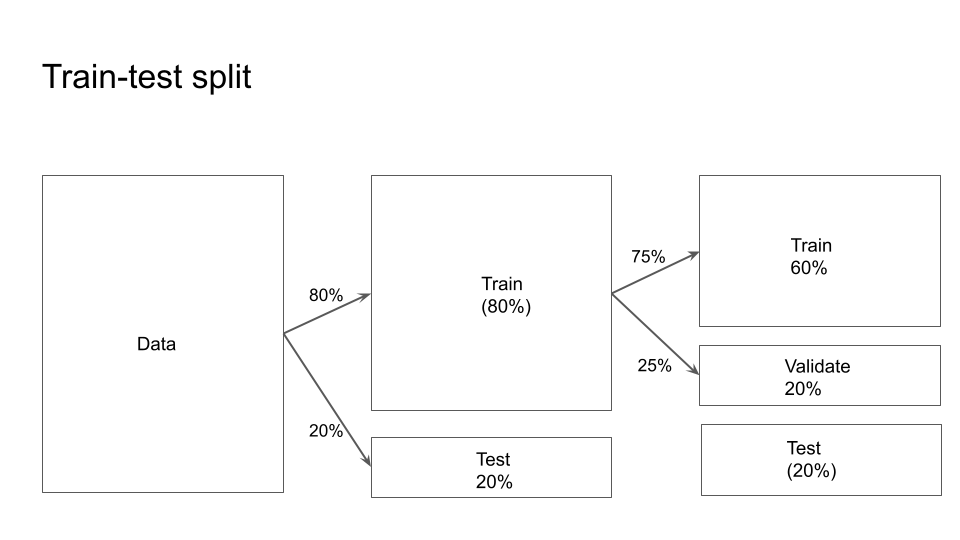

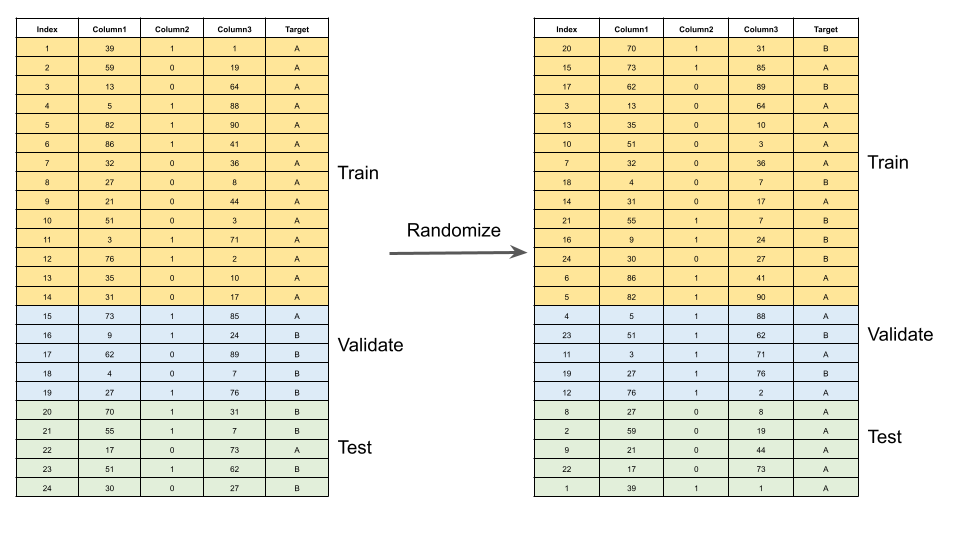

Our target variable contains A and B. Notice how many B values made it into the train dataset. 

Let's correct this by stratifing on our target variable.

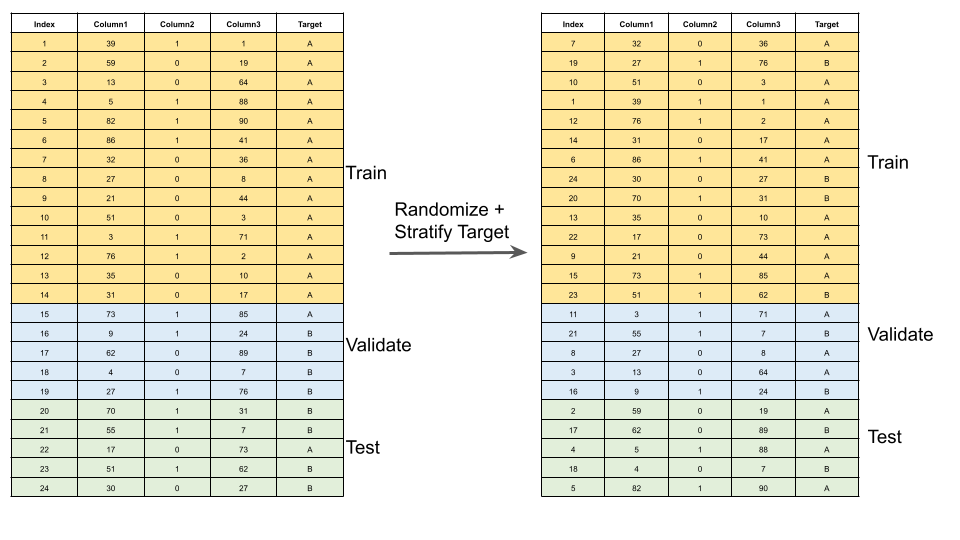

Sklearn allows us to split our data easily:  
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [256]:
# import splitting functions
from sklearn.model_selection import train_test_split

In [257]:
df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
0,0,0,3,male,1,0,7.2500,S,0,1,0,1
1,1,1,1,female,1,0,71.2833,C,0,0,0,0
2,2,1,3,female,0,0,7.9250,S,1,0,0,1
3,3,1,1,female,1,0,53.1000,S,0,0,0,1
4,4,0,3,male,0,0,8.0500,S,1,1,0,1


In [260]:
#first split
train, test = train_test_split(df, #dataframe
                random_state=123, #setting my random seed
                test_size=0.20, #setting the size of my test df
                 stratify=df.survived #stratifying on my target variable
)

In [261]:
# Observe split
print(f'Prepared df: {df.shape}')
print()
print(f'Train: {train.shape}')
print(f'Test: {test.shape}')

Prepared df: (891, 12)

Train: (712, 12)
Test: (179, 12)


In [262]:
len(train) / len(df)

0.7991021324354658

In [264]:
len(test) / len(df)

0.20089786756453423

In [267]:
train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
222,222,0,3,male,0,0,8.0500,S,1,1,0,1
610,610,0,3,female,1,5,31.2750,S,0,0,0,1
249,249,0,2,male,1,0,26.0000,S,0,1,0,1
814,814,0,3,male,0,0,8.0500,S,1,1,0,1
118,118,0,1,male,0,1,247.5208,C,0,1,0,0


Note: this is our first split. there is only train and test. we still need our second split for validate. 

In [270]:
#second split
train, validate = train_test_split(train, 
                random_state=123,
                 test_size=.25,
                 stratify= train.survived
                )

In [271]:
# Observe split
print(f'Prepared df: {df.shape}')
print()
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

Prepared df: (891, 12)

Train: (534, 12)
Validate: (178, 12)
Test: (179, 12)


- Train is now 60% of our data
- Validate is now 20% of our data
- Test is now 20% of our data

### Turn it into a function

In [272]:
def split_titanic(df):
    '''
    Takes in the titanic dataframe and return train, validate, test subset dataframes
    '''
    train, test = train_test_split(df, #first split
                                   test_size=.2, 
                                   random_state=123, 
                                   stratify=df.survived)
    train, validate = train_test_split(train, #second split
                                       test_size=.25, 
                                       random_state=123, 
                                       stratify=train.survived)
    return train, validate, test

Test our new function!

In [275]:
train, validate, test = split_titanic(df)

In [276]:
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

Train: (534, 12)
Validate: (178, 12)
Test: (179, 12)


### We can create a function made of both of our prepare functions!

In [278]:
# Another function? YES PLZ!
def prep_titanic_data(df):
    '''
    The ultimate dishwasher - clean data and split my titanic
    '''
    df = clean_titanic(df)
    
    train, validate, test = split_titanic(df)
    
    return train, validate, test

In [280]:
# Run final prepare function and validate what that the function is working properly
fresh_df = acquire.get_titanic_data()

csv file found and loaded


In [282]:
train, validate, test = prep_titanic_data(fresh_df)

In [284]:
print(f'Clean df: {fresh_df.shape}')
print()
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

Clean df: (891, 13)

Train: (534, 12)
Validate: (178, 12)
Test: (179, 12)


In [285]:
train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
455,455,1,3,male,0,0,7.8958,C,1,1,0,0
380,380,1,1,female,0,0,227.5250,C,1,0,0,0
492,492,0,1,male,0,0,30.5000,S,1,1,0,1
55,55,1,1,male,0,0,35.5000,S,1,1,0,1
243,243,0,3,male,0,0,7.1250,S,1,1,0,1


All three functions that we created can be will be added to a .py file!
- clean_titanic
- split_titanic
- prep_titanic

We end our prepare phase with a prepare.py with all our functions

## Option for Missing Values: Impute


Impute: Assign a value to something by inference


Strategies for imputing:
- fill with 0
- fill with the average
- fill with the median
- fill with subgroup mean
- fill with most frequent value
- build a model to predict missing values



We will use `sklearn.imputer.SimpleImputer` to do this.  

0. Split data into train/validate/test
1. Create the imputer object
    - use determined strategy for impyting
2. Fit to train 
    - used determined strategy to calculated imputed value
    - updates imputer object
3. Transform train/validate/test
    - fill missing values with imputed value on our train, validate, and test df

### lets revisit our initial titanic dataset & fill in the nulls from embark_town

In [288]:
#get fresh titanic data
df_fresh = acquire.get_titanic_data()

csv file found and loaded


In [290]:
#look at nulls of embark_town
df_fresh.embark_town.isnull().sum()

2

#### Step 0. Split data into train/validate/test

In [292]:
#split the data
train, validate, test = split_titanic(df_fresh)

In [293]:
print('embark_town nulls\n')
print(f'train nulls: {train.embark_town.isnull().sum()}')
print(f'validate nulls: {validate.embark_town.isnull().sum()}')
print(f'test nulls: {test.embark_town.isnull().sum()}')

embark_town nulls

train nulls: 1
validate nulls: 1
test nulls: 0


#### Step 1. Create the imputer object

Create the `SimpleImputer` object, which we will store in the variable `imputer`. In the creation of the object, we will specify the strategy to use (mean, median, most_frequent). Essentially, this is creating the instructions and assigning them to a variable, `imputer`.

In [295]:
# import imputing functions
from sklearn.impute import SimpleImputer

In [297]:
# SimpleImputer?

In [305]:
# Define the thing using (strategy = 'most_frequent')
imputer = SimpleImputer(strategy='most_frequent')
imputer

SimpleImputer(strategy='most_frequent')

#### Step 2. Fit to train 

This means that the imputer will determine the most_frequent value, or other value depending on the strategy called, for each column, in the training set only

In [306]:
# fit the thing using imputer.fit()
imputer.fit(train[['embarked']])

SimpleImputer(strategy='most_frequent')

It will store that value in the imputer object. We can call different attributes to see what is stored in the importer. 

In [308]:
imputer.feature_names_in_

array(['embarked'], dtype=object)

In [309]:
imputer.statistics_

array(['S'], dtype=object)

#### Step 3. Transform train/validate/test

Use our imputer object to `transform`. We will call `transform` on our train, validate, and test datasets to fill any missing values.

In [311]:
# Use the thing using imputer.transform()
train[['embarked']] = imputer.transform(train[['embarked']])

validate[['embarked']] = imputer.transform(validate[['embarked']])

test[['embarked']] = imputer.transform(test[['embarked']])

In [313]:
# Validate that there are no longer any Null values in embark_town.
print('embark_town nulls\n')
print(f'train nulls: {train.embarked.isnull().sum()}')
print(f'validate nulls: {validate.embarked.isnull().sum()}')
print(f'test nulls: {test.embarked.isnull().sum()}')

embark_town nulls

train nulls: 0
validate nulls: 0
test nulls: 0
